# Лабораторная работа 1. Алгоритмы на графах.

In [1]:
import networkx as nx
import pylab
import matplotlib.pyplot as plt

Пусть задан граф множеством смежности:

In [2]:
pos = {0: {1, 2},
       1: {3, 4},
       2: {1, 4},
       3: {4},
       4: {1, 3, 5},
       5: {0, 2}}

Создадим соответствующий [направленный граф](https://networkx.github.io/documentation/networkx-1.10/reference/classes.digraph.html):

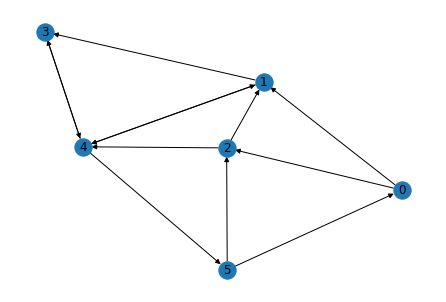

<Figure size 432x288 with 0 Axes>

In [3]:
N = len(pos)
G = nx.DiGraph()
a = [(i, j) for i in range(N) for j in pos[i]] # генерация списка рёбер

G.add_nodes_from(range(N))
G.add_edges_from(a)

nx.draw(G, with_labels=True)

pylab.figure()
plt.show()

# 1. Алгоритмы обхода графа.

Во многих приложениях нужно уметь выписывать все вершины графа по одному разу, начиная с некоторой. Это делается с помощью обходов в глубину или в ширину.

Основная идея обходов:

- на каждом шаге рассмотреть очередную необработанную вершину;
- пометить эту вершину некоторым образом;
- до/после обработки данной вершины осуществить обход из всех нерассмотренных соседей.

Для упорядочивания вершин используется очередь (обход в ширину) или стек (обход в глубину).

# 1.1. Поиск в ширину.

Код программы, реализующей поиск в ширину (с записью предшественников):

In [8]:
def bfs(graph, s, out=0):
    parents = {v: None for v in graph}
    level = {v: None for v in graph}
    level[s] = 0                          # уровень начальной вершины
    queue = [s]                           # добавляем начальную вершину в очередь
    while queue:                          # пока там что-то есть
        v = queue.pop(0)                  # извлекаем вершину
        for w in graph[v]:                # запускаем обход из вершины v
            if level[w] is None:          # проверка на посещенность
                queue.append(w)           # добавление вершины в очередь
                parents[w] = v
                level[w] = level[v] + 1   # подсчитываем уровень вершины
        if out: print(level[w], level, queue)
    return level, parents

И программы, востанавливающей маршрут:

In [11]:
def PATH(end, parents):
    path = [end]
    parent = parents[end]
    while not parent is None:
        path.append(parent)
        parent = parents[parent]
    return path[::-1]

# 1.2. Поиск в глубину.

Код программы, реализующей поиск в глубину (с записью предшественников):

In [6]:
def dfs(graph, s, out=0):
    level = {v: None for v in graph}   
    level[s] = 0                                # уровень начальной вершины
    queue = [s]                                 # добавляем начальную вершину в очередь
    while queue:                                # пока там что-то есть
        v = queue.pop(-1)                       # извлекаем вершину
        for w in graph[v]:                      # запускаем обход из вершины v
            if level[w] is None:                # проверка на посещенность
                queue.append(w)                 # добавление вершины в очередь
                level[w] = level[v] + 1         # подсчитываем уровень вершины
        if out: print(level[w], level, queue)
    return level

In [7]:
dfs(pos, 0, 1)

1 {0: 0, 1: 1, 2: 1, 3: None, 4: None, 5: None} [1, 2]
2 {0: 0, 1: 1, 2: 1, 3: None, 4: 2, 5: None} [1, 4]
3 {0: 0, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3} [1, 3, 5]
1 {0: 0, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3} [1, 3]
2 {0: 0, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3} [1]
2 {0: 0, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3} []


{0: 0, 1: 1, 2: 1, 3: 3, 4: 2, 5: 3}

In [8]:
pos[2]

{1, 4}

# Пример 1.

Определим с помощью поиска в ширину кратчайший маршрут:

In [9]:
level, parents = bfs(pos, 0, out=0)

In [10]:
level

{0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3}

In [11]:
parents

{0: None, 1: 0, 2: 0, 3: 1, 4: 1, 5: 4}

In [12]:
path = PATH(5, parents)
print(path)

[0, 1, 4, 5]


Визуализируем этот маршрут:

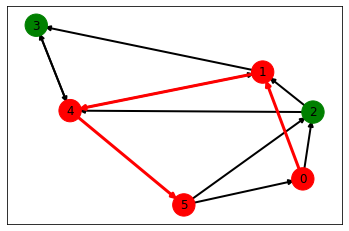

In [13]:
red_node = set(path)                                                # вершины маршрута
red_edges = [ (path[i],path[i+1]) for i in range(len(path)-1) ]     # рёбра маршрута

# разделение по цветам вершин и рёбер
node_colours = ['g' if not node in red_node else 'red' for node in G.nodes()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# построение графа
#p = nx.spring_layout(G)

p = {0: [ 0.38144628, -0.66882419],
 1: [0.23970166, 0.49135202],
 2: [0.41724407, 0.05678197],
 3: [-0.55966794,  1.        ],
 4: [-0.44016179,  0.07245783],
 5: [-0.03856228, -0.95176763]}

nx.draw_networkx_nodes(G, p, cmap=plt.get_cmap('jet'), node_color=node_colours, node_size=500)
nx.draw_networkx_labels(G, p)
nx.draw_networkx_edges(G, p, edgelist=black_edges, width=2.0, edge_color='k', arrows=True)
nx.draw_networkx_edges(G, p, edgelist=red_edges, width=3.0, edge_color='r', arrows=True)

plt.show()

In [14]:
# координаты вершин на рисунке
p

{0: [0.38144628, -0.66882419],
 1: [0.23970166, 0.49135202],
 2: [0.41724407, 0.05678197],
 3: [-0.55966794, 1.0],
 4: [-0.44016179, 0.07245783],
 5: [-0.03856228, -0.95176763]}

# Упражнение 1

Две вершины (`v` и `u`) ориентированного графа называют сильно связными, если существует путь из `v` в `u` и существует путь из `u` в `v`. Ориентированный граф называется сильно связным, если любые две его вершины сильно связны.

Напишите функцию, использующую модифицированый алгоритм поиска в глубину (алгоритм Косарайю) для определения компонент сильной связности.

Алгоритм:

1. Инвертируем дуги исходного ориентированного графа.
2. Запускаем поиск в глубину на этом обращённом графе, запоминая, в каком порядке выходили из вершин.
3. Запускаем поиск в глубину на исходном графе, в очередной раз выбирая непосещённую вершину с максимальным номером в векторе, полученном в п.2.

Полученные из п.3 деревья и являются сильно связными компонентами.

Найдите и постройте графически с помощью этой функции компоненты сильной связности графа:

In [15]:
pos2 = {0: {1, 2},
        1: {3, 4},
        2: {1, 4},
        3: {4},
        4: {1, 3, 5},
        5: {0, 2},
        6: {3, 0, 5},
        7: {2, 1},
        8: {0, 7, 3},
        9: {2, 4, 6, 8}}

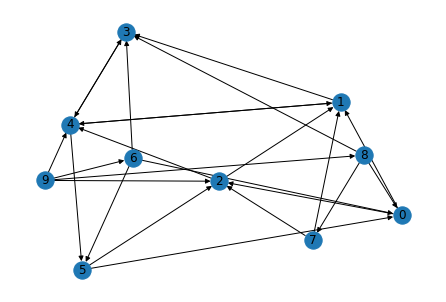

<Figure size 432x288 with 0 Axes>

In [16]:
N = 10
G = nx.DiGraph()
a = [(i, j) for i in range(N) for j in pos2[i]] # генерация списка рёбер

G.add_nodes_from(range(N))
G.add_edges_from(a)

nx.draw(G, with_labels=True)

pylab.figure()
plt.show()

In [17]:
def kosaraju(g):
    size = len(g)

    vis = [False] * size
    l = [0] * size
    x = size
    t = [[]] * size

    def visit(g, vis, u, x, l, t):
        if not vis[u]:
            vis[u] = True
            for v in g[u]:
                vis, x, l, t = visit(g, vis, v, x, l, t)
                t[v] = t[v] + [u]
            x -= 1
            l[x] = u
        return vis, x, l, t
            
    for u in range(len(g)):
        vis, x, l, t = visit(g, vis, u, x, l, t)
    c = [0] * size

    def assign(vis, c, t, u, root):
        if vis[u]:
            vis[u] = False
            c[u] = root
            for v in t[u]:
                vis, c, t = assign(vis, c, t, v, root)  
        return vis, c, t

    for u in l:
        vis, c, t = assign(vis, c, t, u, u)
    
    print('Компоненты сильной связности:')
    dup = {i: 0 for i in range(len(c))}
    for i in c:
        dup[i] += 1
    css = []
    for i in dup.keys():
        if dup[i] > 1:
            for j in range(len(c)):
                if c[j] == i:
                    print(j, ', ', sep='', end='')
                    css.append(j)
            print()
    return css

In [18]:
css = kosaraju(pos2)

Компоненты сильной связности:
0, 1, 2, 3, 4, 5, 


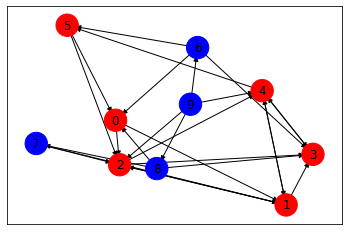

<Figure size 432x288 with 0 Axes>

In [19]:
N = len(pos2)
G = nx.DiGraph()
a = [(i, j) for i in range(N) for j in pos2[i]]

G.add_nodes_from(range(N))
G.add_edges_from(a)

p = nx.spring_layout(G)
red_node = set(css)
red_edges = [ (css[i],css[i+1]) for i in range(len(css)-1) ]

node_colours = ['b' if not node in red_node else 'red' for node in G.nodes()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

nx.draw_networkx_nodes(G, p, cmap=plt.get_cmap('jet'), node_color=node_colours, node_size=500)
nx.draw_networkx_labels(G, p)
nx.draw_networkx_edges(G, p, edgelist=black_edges, width=1.0, edge_color='k', arrows=True)
nx.draw_networkx_edges(G, p, edgelist=red_edges, width=1.0, edge_color='k', arrows=True)

pylab.figure()
plt.show()

# Пример 2. Ход конём

Создадим две строки, комбинация которых даст нам обозночения всех клеток шахматного поля:

In [2]:
letters = 'abcdefgh'
numbers = '12345678'

Создадим структуру типа словарь для хранения графа в формате множества смежности:

In [3]:
graph = dict()
graph

{}

Заполним имена вершин графа:

In [4]:
for l in letters:
    for n in numbers:
        graph[l+n] = set()

Заполним множества смежности:

In [5]:
def add_edge(graph, v1, v2):
    graph[v1].add(v2)
    graph[v2].add(v1)              

In [6]:
for i in range(8):
    for j in range(8):
        v1 = letters[i]+numbers[j]
        v2 = ''
        if 0<=i+2<8 and 0<=j+1<8:
            v2 = letters[i+2]+numbers[j+1]
            add_edge(graph, v1, v2)
            
        if 0<=i-2<8 and 0<=j+1<8:
            v2 = letters[i-2]+numbers[j+1]
            add_edge(graph, v1, v2)
            
        if 0<=i+1<8 and 0<=j+2<8:
            v2 = letters[i+1]+numbers[j+2]
            add_edge(graph, v1, v2)            
            
        if 0<=i-1<8 and 0<=j+2<8:
            v2 = letters[i-1]+numbers[j+2]
            add_edge(graph, v1, v2)  

Проведём сканирование графа в ширину:

In [9]:
start = 'd4'
end = 'f7'

level, parents = bfs(graph, start)

И получим маршрут коня:

In [12]:
PATH(end, parents)

['d4', 'f5', 'h6', 'f7']

# Упражнение 2.

Нарисуйте граф, соответствующий маршрутам коня по шахматной доске, и отметьте на нём найденный маршрут.

In [13]:
Kpath = PATH(end, parents)

In [14]:
p = {}
for l in range(len(letters)):
    for n in range(len(numbers)):
        p[letters[l]+numbers[n]] = [-1 + l * 0.25, -1 + n * 0.25]

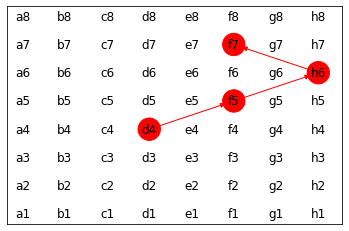

<Figure size 432x288 with 0 Axes>

In [15]:
G = nx.DiGraph()
a = [(i, j) for i in graph for j in graph[i]]

G.add_edges_from(a)

#p = nx.spring_layout(G)
red_node = set(Kpath)
red_edges = [ (Kpath[i],Kpath[i+1]) for i in range(len(Kpath)-1) ]

node_colours = ['w' if not node in red_node else 'r' for node in G.nodes()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

nx.draw_networkx_nodes(G, p, cmap=plt.get_cmap('jet'), node_color=node_colours, node_size=500)
nx.draw_networkx_labels(G, p)
nx.draw_networkx_edges(G, p, edgelist=red_edges, width=1.0, edge_color='r', arrows=True)

pylab.figure()
plt.show()

# Упражнение 3. Раскраски.

Рассмотрим граф `G(V,E)`, имеющий `V` вершин и `E` ребер. Раскраской графа `G` называется окрашивание вершин графа `G` такое, что никакие две смежные вершины не имеют одинаковый цвет. Хроматическое число графа `X(G)` - это наименьшее число цветов, которое используется для раскраски графа. Известен жадный алгоритм раскраски графа.

Жадный алгоритм последовательного раскрашивания:

Входные данные: граф `G(V,E)`.  
Выходные данные: массив `c[v]` раскрашенных вершин
1. Для всех вершин определить множество `А = {1,2,3..,n}` всех цветов.
2. Выбрать стартовую вершину (с которой начинаем алгоритм). Раскрасить вершину в цвет `color`. Вычеркнуть этот цвет из множества цветов всех вершин, смежных со стартовой.
3. Выбрать нераскрашенную вершину `v`
4. Раскрасить выбранную вершину в минимально возможный цвет из множества `А`. Вычеркнуть этот цвет из множества цветов всех вершин, смежных с вершиной `v`.
5. Проделать шаг 3, шаг 4 для всех нераскрашенных вершин графа.

На основе этого алгоритма раскрасьте граф из задачи про коня.

In [16]:
def ggca(graph):
    colors = {i: None for i in graph.keys()}
    for i in graph.keys():
        minimal_set = []
        for s in graph[i]:
            if colors[s] is not None:
                minimal_set.append(colors[s])
        for c in range(len(graph)):
            if c not in minimal_set:
                colors[i] = c
                break
    return colors

In [20]:
r = ggca(graph)
r

{'a1': 0,
 'a2': 0,
 'a3': 0,
 'a4': 0,
 'a5': 0,
 'a6': 0,
 'a7': 0,
 'a8': 0,
 'b1': 1,
 'b2': 1,
 'b3': 1,
 'b4': 1,
 'b5': 1,
 'b6': 1,
 'b7': 1,
 'b8': 1,
 'c1': 2,
 'c2': 2,
 'c3': 2,
 'c4': 2,
 'c5': 2,
 'c6': 2,
 'c7': 2,
 'c8': 2,
 'd1': 0,
 'd2': 0,
 'd3': 0,
 'd4': 0,
 'd5': 0,
 'd6': 0,
 'd7': 0,
 'd8': 0,
 'e1': 1,
 'e2': 1,
 'e3': 1,
 'e4': 1,
 'e5': 1,
 'e6': 1,
 'e7': 1,
 'e8': 1,
 'f1': 2,
 'f2': 2,
 'f3': 2,
 'f4': 2,
 'f5': 2,
 'f6': 2,
 'f7': 2,
 'f8': 2,
 'g1': 0,
 'g2': 0,
 'g3': 0,
 'g4': 0,
 'g5': 0,
 'g6': 0,
 'g7': 0,
 'g8': 0,
 'h1': 1,
 'h2': 1,
 'h3': 1,
 'h4': 1,
 'h5': 1,
 'h6': 1,
 'h7': 1,
 'h8': 1}

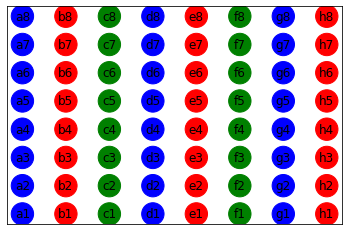

<Figure size 432x288 with 0 Axes>

In [22]:
G = nx.DiGraph()
a = [(i, j) for i in graph for j in graph[i]]

G.add_edges_from(a)

#p = nx.spring_layout(G)

node_colours = ['b' if r[node] == 0 else 'r' if r[node] == 1 else 'g' for node in G.nodes()]

nx.draw_networkx_nodes(G, p, cmap=plt.get_cmap('jet'), node_color=node_colours, node_size=500)
nx.draw_networkx_labels(G, p)

pylab.figure()
plt.show()

# Домашнее задание (базовое):

# Задание 1. Алгоритм Дейкстры

Напишите функцию, реализующую алгоритм Дейкстры.

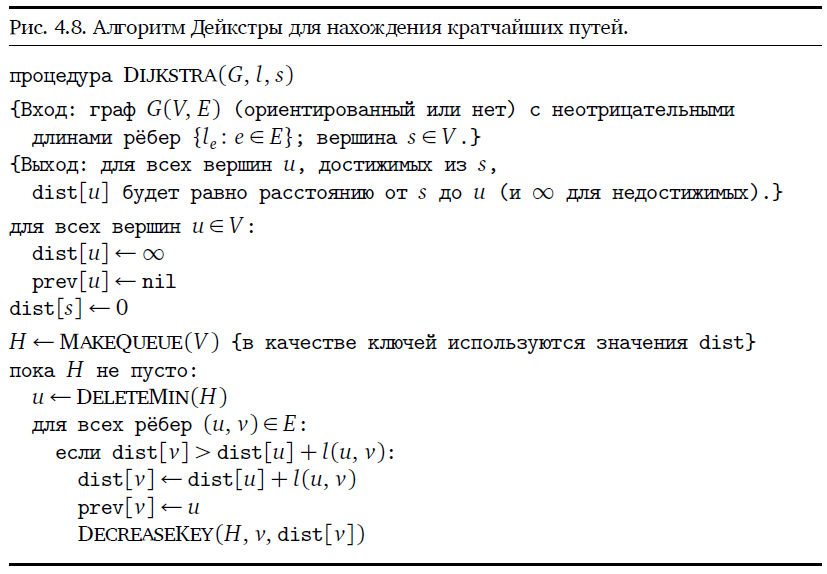

In [228]:
# Так можно добавлять картинки

from IPython.display import Image # вызов из библиотеки определённой функции
Image("Dijkstra.png")             # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

In [32]:
import sys

class Graph():
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)] for row in range(vertices)]
    
    def min_distance(self, dist, sptSet):
        min = sys.maxsize
        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
        return min_index
    
    def dijkstra(self, src):
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
        for cout in range(self.V):
            u = self.min_distance(dist, sptSet)
            sptSet[u] = True
            for v in range(self.V):
                if self.graph[u][v] > 0 and sptSet[v] == False and dist[v] > dist[u] + self.graph[u][v]:
                    dist[v] = dist[u] + self.graph[u][v]
        self.show(dist)
    
    def show(self, dist):
        print("Вершина  Расстояние до источника")
        for node in range(self.V):
            print(node, "\t", dist[node])

# Задание 2. 

Сгенерируйте случайный взвешенный граф. И определите на нём маршрут минимальной длины с помощью алгоритма Дейкстры.

In [33]:
import random

dir(random)

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_accumulate',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_log',
 '_os',
 '_pi',
 '_random',
 '_repeat',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [34]:
from datetime import datetime

random.seed(datetime.now())
size = int(random.uniform(4, 17))
w = [[0] * size] * size
for i in range(len(w)):
    for j in range(len(w[i])):
        w[i][j] = int(random.uniform(0, 101))
        
g = Graph(size)
g.graph = w

g.dijkstra(0)

Вершина  Расстояние до источника
0 	 0
1 	 5
2 	 100
3 	 71
4 	 83
5 	 88


# Задание 3.

Проиллюстрируйте работу одного из алгоритмов (поиска в ширину или глубину, Дейкстры) с помощью визуализации действий с графом на каждой итерации с помощью библиотек `networkx` и `matplotlib`, аналогично примеру 1.

In [35]:
# возьмём поиск в ширину `bfs(graph, start)` и граф, заданный множеством смежности `pos`

<Figure size 432x288 with 0 Axes>

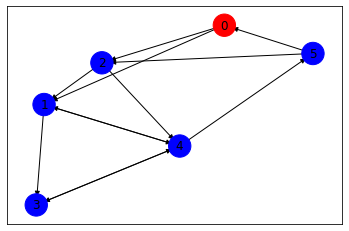

<Figure size 432x288 with 0 Axes>

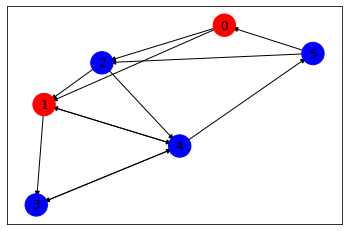

<Figure size 432x288 with 0 Axes>

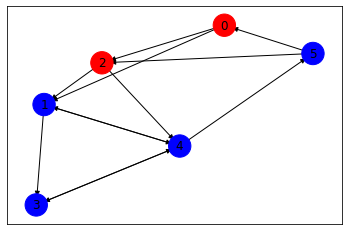

<Figure size 432x288 with 0 Axes>

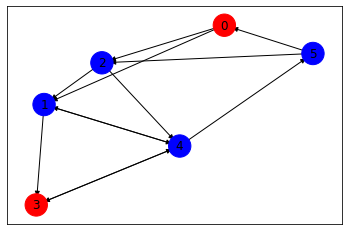

<Figure size 432x288 with 0 Axes>

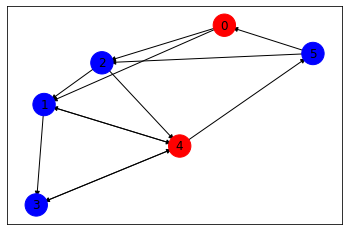

<Figure size 432x288 with 0 Axes>

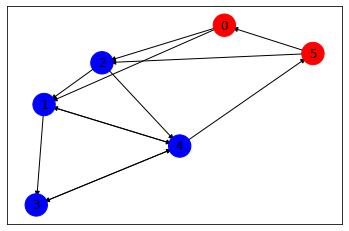

<Figure size 432x288 with 0 Axes>

({0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: 3}, {0: None, 1: 0, 2: 0, 3: 1, 4: 1, 5: 4})

In [42]:
import time

G = nx.DiGraph()
a = [(i, j) for i in pos for j in pos[i]]

G.add_edges_from(a)
node_colours = ['b' for node in G.nodes()]
edges = [i for i in G.edges()]
p = nx.spring_layout(G)

pylab.figure()
plt.show()

def redraw(prev, curr):
    if prev:
        node_colours[prev] = 'b'
    node_colours[curr] = 'r'
    nx.draw_networkx_nodes(G, p, cmap=plt.get_cmap('jet'), node_color=node_colours, node_size=500)
    nx.draw_networkx_labels(G, p)
    nx.draw_networkx_edges(G, p, edgelist=edges, width=1.0, edge_color='k', arrows=True)
    pylab.figure()
    plt.show()

def bfs_vis(graph, s, out=0):
    parents = {v: None for v in graph}
    level = {v: None for v in graph}
    level[s] = 0
    queue = [s]
    prev = None
    while queue:
        v = queue.pop(0)
        redraw(prev, v)
        prev = v
        time.sleep(1)
        for w in graph[v]:
            if level[w] is None:
                queue.append(w)
                parents[w] = v
                level[w] = level[v] + 1
        if out: print(level[w], level, queue)
    return level, parents

time.sleep(1)

bfs_vis(pos, 0)

# Задание 4. В библиотеке.

Используйте какой-нибудь интересный алгоритм из [библиотеки](https://networkx.github.io/documentation/stable/reference/algorithms/index.html).

In [49]:
print('Радиус построенного нами выше графа равен ', nx.algorithms.distance_measures.radius(G), '.', sep='')

Радиус построенного нами выше графа равен 2.


# Домашнее задание (дополнительное):

# Задание. Алгоритм Форда - Беллмана

Напишите функцию, реализующую [алгоритм Форда-Беллмана](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%91%D0%B5%D0%BB%D0%BB%D0%BC%D0%B0%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%BE%D1%80%D0%B4%D0%B0).

In [58]:
import math

def ford_bellman(W, start):
    N = len(W)
    F = [[math.inf] * N for i in range(N)]
    F[0][start] = 0 
    for k in range(1, N): 
        for i in range(N): 
            F[k][i] = F[k - 1][i]
            for j in range(N):
                if F[k - 1][j] + W[j][i] < F[k][i]:
                    F[k][i] = F[k - 1][j] + W[j][i]
    return F

In [60]:
W = [[1, 2, 3],
     [1, 2, 9],
     [9, 5, 1]]

ford_bellman(W, 0)

[[0, inf, inf], [0, 2, 3], [0, 2, 3]]

# Задание. Лабиринт.

Найдите выход из лабирита с помощью различных алгоритмов и сравните их. (Взвести рёбра пропорционально их длине.)

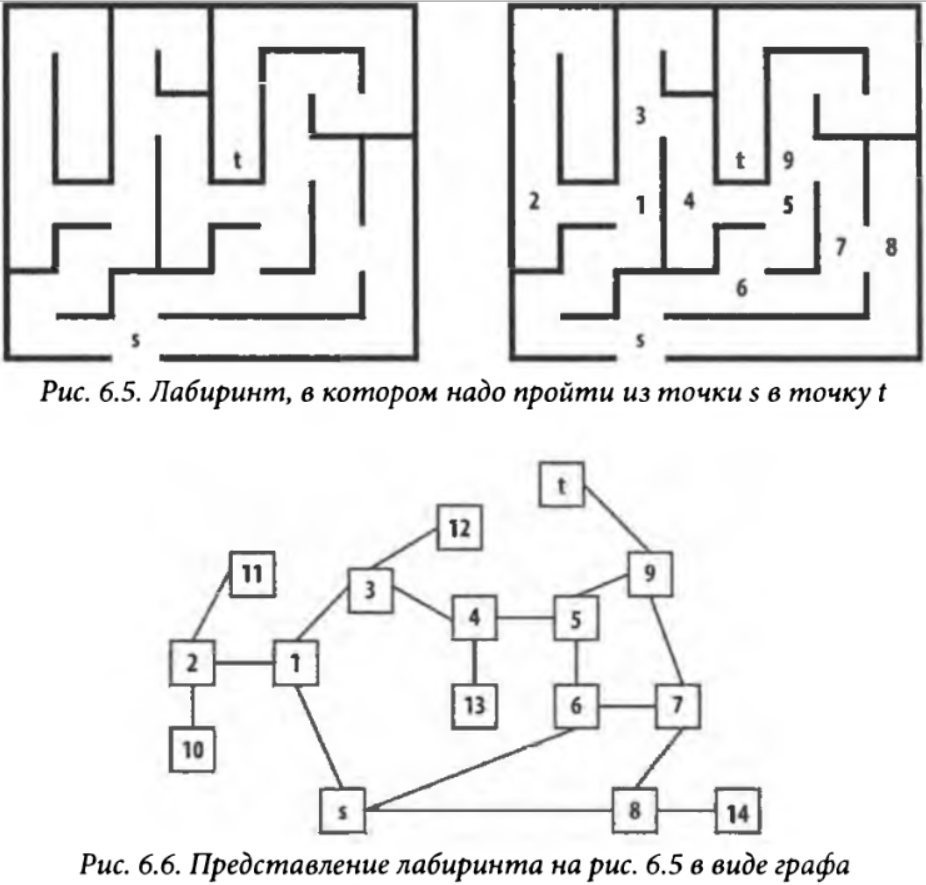

In [2]:
# Так можно добавлять картинки

from IPython.display import Image # вызов из библиотеки определённой функции
Image("Лабиринт.png")             # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

# Задание. Электроскутер.

У Еремея есть электросамокат, и он хочет доехать от дома до института, затратив как можно меньше энергии. Весь город расположен на холмистой местности и разделён на квадраты. Для каждого перекрёстка известна его высота в метрах над уровнем моря. Если ехать от перекрёстка с большей высотой до смежного с ним перекрёстка с меньшей высотой, то электроэнергию можно аккумулировать (заряжая скутор), а если наоборот, то расход энергии равен разнице высот между перекрёстками.
Помогите Еремею спланировать маршрут, чтобы он затратил наименьшее возможное количество энергии от дома до института и определите это количество.